###### Problem Statement:
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

When a person applies for a loan, there are two types of decisions that could be taken by the company:
  1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
   • Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
   • Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These          candidates are not labelled as 'defaulted'.
   • Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted            other loan.
  
  2. Loan rejected:
    The company had rejected the loan (because the candidate does not meet their requirements etc.).Since the loan was               rejected,there is no transactional history of those applicants with the company and so this data is not available with the       company (and   thus in this dataset).
    
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.The company can utilise this knowledge for its portfolio and risk assessment.

Objective:
    How consumer attributes and loan attributes influence the tendency of default.

##### Data loading and Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

df_loan=pd.read_csv(r"C:\Users\Lending_club_casestudy_EDA\loan\loan.csv")

#shape of dataframe
print(df_loan.shape)

(39717, 111)


C:\Users\nibed\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#From above result we found 39717 rows and 111 columns.

#check for header and footer, if present remove to simply analysis

df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df_loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#From above result we found there is no header or footer.
#checking mean, max, min other parameters to compare after the same parameters after data cleaning
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
#Checking for rows that are required for analysis
df_loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [6]:
#dropping loan_status=Current as these willn't contibute to 
df_loan=df_loan[df_loan['loan_status']!='Current']
print("Number of rows after dropping current:",len(df_loan))

Number of rows after dropping current: 38577


In [7]:
#checking duplicate rows
rows_duplicate=len(df_loan[df_loan.duplicated()])
print("Number of duplicate rows:",rows_duplicate)

Number of duplicate rows: 0


In [8]:
#drop columns with null values
print("Number of rows and Columns before deleting uneccessary columns:",df_loan.shape)

df_loan=df_loan.dropna(axis=1,how='all') #axis=1 for column,axis =0 for rows for 'all' na as value

print("Number of rows and Columns after deleting uneccessary columns:",df_loan.shape)

Number of rows and Columns before deleting uneccessary columns: (38577, 111)
Number of rows and Columns after deleting uneccessary columns: (38577, 56)


In [9]:
#delete columns with unique value as these dont contribute for analysing to understand the tendency of defaulters.

unique_col = [col for col in df_loan.columns if df_loan[col].nunique()==len(df_loan)]
print("Unique columns:",unique_col)

#delete these unique columns along with decsriptiona and title column
df_loan.drop(['member_id', 'url','desc','title'],axis=1,inplace=True)
unique_col1 = [col for col in df_loan.columns if df_loan[col].nunique()==len(df_loan)]
print("Unique columns after deletion:",unique_col1) 



Unique columns: ['id', 'member_id', 'url']
Unique columns after deletion: ['id']


In [10]:
print("Number of rows and Columns after deleting some more uneccessary columns:",df_loan.shape)

Number of rows and Columns after deleting some more uneccessary columns: (38577, 52)


In [11]:
df_loan.drop(['sub_grade'],axis=1,inplace=True)
print("Number of rows and Columns after deleting some more uneccessary columns:",df_loan.shape)

Number of rows and Columns after deleting some more uneccessary columns: (38577, 51)


In [12]:
#dropping columns that will contribute for analysis
df_loan.drop(['application_type','collection_recovery_fee','delinq_2yrs','earliest_cr_line','inq_last_6mths','last_credit_pull_d',
             'last_pymnt_amnt','last_pymnt_d','open_acc','out_prncp','out_prncp_inv','pub_rec','recoveries','total_pymnt',
             'total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp'],axis=1,inplace=True)
print("Number of rows and Columns after deleting some more uneccessary columns:",df_loan.shape)

Number of rows and Columns after deleting some more uneccessary columns: (38577, 33)


In [13]:
df_loan=df_loan.drop('revol_util',axis=1)
df_loan.shape

(38577, 32)

In [14]:
for col in df_loan.columns:
    print(col)

id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
purpose
zip_code
addr_state
dti
mths_since_last_delinq
mths_since_last_record
revol_bal
total_acc
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
pub_rec_bankruptcies
tax_liens


In [15]:
#deleting columns with unique single value in all rows
df_loan.nunique().sort_values()

pymnt_plan                        1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
tax_liens                         1
term                              2
loan_status                       2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv             

In [16]:
for col in df_loan.columns:
    if df_loan[col].nunique(dropna=True)==1:
        df_loan=df_loan.drop(col,axis=1)
        print(col)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


In [17]:
df_loan.nunique().sort_values()

loan_status                   2
term                          2
pub_rec_bankruptcies          3
verification_status           3
home_ownership                5
grade                         7
emp_length                   11
purpose                      14
addr_state                   50
issue_d                      55
total_acc                    82
mths_since_last_delinq       95
mths_since_last_record      111
int_rate                    370
zip_code                    822
loan_amnt                   870
funded_amnt                1019
dti                        2853
annual_inc                 5215
funded_amnt_inv            8050
installment               15022
revol_bal                 21275
emp_title                 28027
id                        38577
dtype: int64

In [18]:
df_loan.shape

(38577, 24)

In [19]:
#deleting columns with more than 50% null value

for col in df_loan.columns:
    if df_loan[col].isna().mean().round(2) >= 0.50:
        df_loan=df_loan.drop(col,axis=1)
        print(col)

mths_since_last_delinq
mths_since_last_record


In [20]:
df_loan.shape

(38577, 22)

In [21]:
#deleting empty title
df_loan=df_loan.drop('emp_title',axis=1)

In [22]:
df_loan.shape

(38577, 21)

##### Data Conversion

In [23]:
df_loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
revol_bal                 int64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [24]:
df_loan['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [25]:
def term_to_int(term):
    return int(term.strip().split()[0])

df_loan['term']=df_loan['term'].apply(term_to_int)
df_loan['term'].dtypes

dtype('int64')

In [26]:
df_loan['term'].value_counts()

36    29096
60     9481
Name: term, dtype: int64

#Above code Converted 'term' string type to int type by parsing number of months and months to just numbers.

In [27]:
df_loan['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
17.34%      1
17.44%      1
18.72%      1
21.48%      1
18.36%      1
Name: int_rate, Length: 370, dtype: int64

In [28]:
#change string (remove %) data to float
df_loan['int_rate']=df_loan['int_rate'].str.strip('%').astype(float)
df_loan['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
17.46      1
16.71      1
21.48      1
20.52      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

In [29]:
df_loan['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [30]:
#convert loan_amnt ,funded_amnt from int to float 
df_loan=df_loan.astype({'loan_amnt':'float','funded_amnt':'float'})
df_loan.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,revol_bal,total_acc,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,...,Verified,11-Dec,Fully Paid,credit_card,860xx,AZ,27.65,13648,9,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,...,Source Verified,11-Dec,Charged Off,car,309xx,GA,1.00,1687,4,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,...,Not Verified,11-Dec,Fully Paid,small_business,606xx,IL,8.72,2956,10,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,...,Source Verified,11-Dec,Fully Paid,other,917xx,CA,20.00,5598,37,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,...,Source Verified,11-Dec,Fully Paid,wedding,852xx,AZ,11.20,7963,12,0.0
6,1069639,7000.0,7000.0,7000.0,60,15.96,170.08,C,8 years,RENT,...,Not Verified,11-Dec,Fully Paid,debt_consolidation,280xx,NC,23.51,17726,11,0.0
7,1072053,3000.0,3000.0,3000.0,36,18.64,109.43,E,9 years,RENT,...,Source Verified,11-Dec,Fully Paid,car,900xx,CA,5.35,8221,4,0.0
8,1071795,5600.0,5600.0,5600.0,60,21.28,152.39,F,4 years,OWN,...,Source Verified,11-Dec,Charged Off,small_business,958xx,CA,5.55,5210,13,0.0
9,1071570,5375.0,5375.0,5350.0,60,12.69,121.45,B,< 1 year,RENT,...,Verified,11-Dec,Charged Off,other,774xx,TX,18.08,9279,3,0.0
10,1070078,6500.0,6500.0,6500.0,60,14.65,153.45,C,5 years,OWN,...,Not Verified,11-Dec,Fully Paid,debt_consolidation,853xx,AZ,16.12,4032,23,0.0


In [31]:
df_loan.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,revol_bal,total_acc,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,...,Verified,11-Dec,Fully Paid,credit_card,860xx,AZ,27.65,13648,9,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,...,Source Verified,11-Dec,Charged Off,car,309xx,GA,1.00,1687,4,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,...,Not Verified,11-Dec,Fully Paid,small_business,606xx,IL,8.72,2956,10,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,...,Source Verified,11-Dec,Fully Paid,other,917xx,CA,20.00,5598,37,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,...,Source Verified,11-Dec,Fully Paid,wedding,852xx,AZ,11.20,7963,12,0.0
6,1069639,7000.0,7000.0,7000.0,60,15.96,170.08,C,8 years,RENT,...,Not Verified,11-Dec,Fully Paid,debt_consolidation,280xx,NC,23.51,17726,11,0.0
7,1072053,3000.0,3000.0,3000.0,36,18.64,109.43,E,9 years,RENT,...,Source Verified,11-Dec,Fully Paid,car,900xx,CA,5.35,8221,4,0.0
8,1071795,5600.0,5600.0,5600.0,60,21.28,152.39,F,4 years,OWN,...,Source Verified,11-Dec,Charged Off,small_business,958xx,CA,5.55,5210,13,0.0
9,1071570,5375.0,5375.0,5350.0,60,12.69,121.45,B,< 1 year,RENT,...,Verified,11-Dec,Charged Off,other,774xx,TX,18.08,9279,3,0.0
10,1070078,6500.0,6500.0,6500.0,60,14.65,153.45,C,5 years,OWN,...,Not Verified,11-Dec,Fully Paid,debt_consolidation,853xx,AZ,16.12,4032,23,0.0


In [32]:
df_loan['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [33]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

df_loan = df_loan.replace({"emp_length":emp_length_dict})

In [34]:
df_loan['emp_length'].value_counts().astype(int)

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int32

In [35]:
#convert issue_d string obj type to date format
df_loan['issue_d']

0        11-Dec
1        11-Dec
2        11-Dec
3        11-Dec
5        11-Dec
          ...  
39712     7-Jul
39713     7-Jul
39714     7-Jul
39715     7-Jul
39716     7-Jun
Name: issue_d, Length: 38577, dtype: object

In [36]:
#as to_datetime fumction with %b-%y doesn't work had aplly this solution to convert single digit year to format.
def convert_single_digit_year(date_str):
    parts = date_str.split('-')
    if int(parts[0]) < 10:
        parts[0] = '200' + parts[0]
    else:
        parts[0] = '20' + parts[0]
    return '-'.join(parts)

# Apply the function to the 'issue_d' column and convert it to datetime format
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'].apply(convert_single_digit_year), format="%Y-%b", errors='coerce')

In [37]:
df_loan['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [38]:
#checking null value %
(df_loan.isnull().sum()*100)/len(df_loan)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
revol_bal               0.000000
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

Above we found out emp_length is having 2.67 % and pub_rec_bankruptcies is having 1.8 % null values

Imputing/dropping rows
As these two rows together has total less than 5% data we can drop, otherwise we have to impute

In [39]:
df_loan.shape

(38577, 21)

In [40]:
df_loan=df_loan[df_loan['emp_length'].notna()]
df_loan=df_loan[df_loan['pub_rec_bankruptcies'].notna()]

In [41]:
df_loan.shape

(36847, 21)

4.48% data has been dropped after above run

In [42]:
#checking null value % after dropping rows with null values
(df_loan.isnull().sum()*100)/len(df_loan)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
revol_bal               0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

### Univariate and Segmented univariate Analysis

In [43]:
#Derived Column
#get issue year and month from issue date
df_loan['issue_year']=pd.DatetimeIndex(df_loan['issue_d']).year
df_loan['issue_month']=pd.DatetimeIndex(df_loan['issue_d']).month
#df_loan['issue_year']
#df_loan['issue_month']

In [44]:
df_loan['emp_length']

0        10.0
1         0.0
2        10.0
3        10.0
5         3.0
         ... 
39562     1.0
39573     3.0
39623     8.0
39666     2.0
39680     2.0
Name: emp_length, Length: 36847, dtype: float64

In [45]:
def strip_emp_length(x):
    x=x.strip("years")
    x=x.strip("<")
    x=x.replace(" ","")
    x=x.replace(" +","")
    return x

In [46]:
#Data dictionary for EDA plots with field names for the respective variable name

column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt':'Funded Amount',
    'funded_amnt_inv':'Funded amount Investors',
    'term':' Loan Trem',
    'int_rate': 'interest Rate',
    'installment':'Installment',
    'grade':'Grade',
    'emp_length':'Employment Length',
    'home_ownership':'Home owner Status',
    'annual_inc':'Annual Income',
    'verification_status':'Verification Status',
    'issue_date':'Issue Date',
    'loan_status':'Loan Status',
    'purpose':'Purpose',
    'addr_state':'State',
    'dti':'Debt To Income Ratio',
    'pub_rec_bankruptcies':'Bankruptcy Record',
    'issue_m':'Issue Month',
    'issue_y':'Issue year',
    'issue_quarter':'Issue quarter',
    'loan_amnt_b':'Loan Amount Bins',
    'funded_amnt_inv_b':'Investors Funded Bins',
    'funded_amnt_b':'Funded Amount Bins',
    'annual_inc_b':'Annual Income Bins',
    'int_rate_b':'Interest Rate Bins',
    'dti_b':'DTI Bins'

}

In [47]:
def plot_diagram(df,column):
    fig,p=plt.subplots(1,2,figsize=(16,9))
    sns.distplot(df.loc[df[column].notnull(),column],kde=True,hist=True,ax=p[0])
    sns.boxplot(x=column,data=df,ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

The above function will create two plots distribution plot and box plot

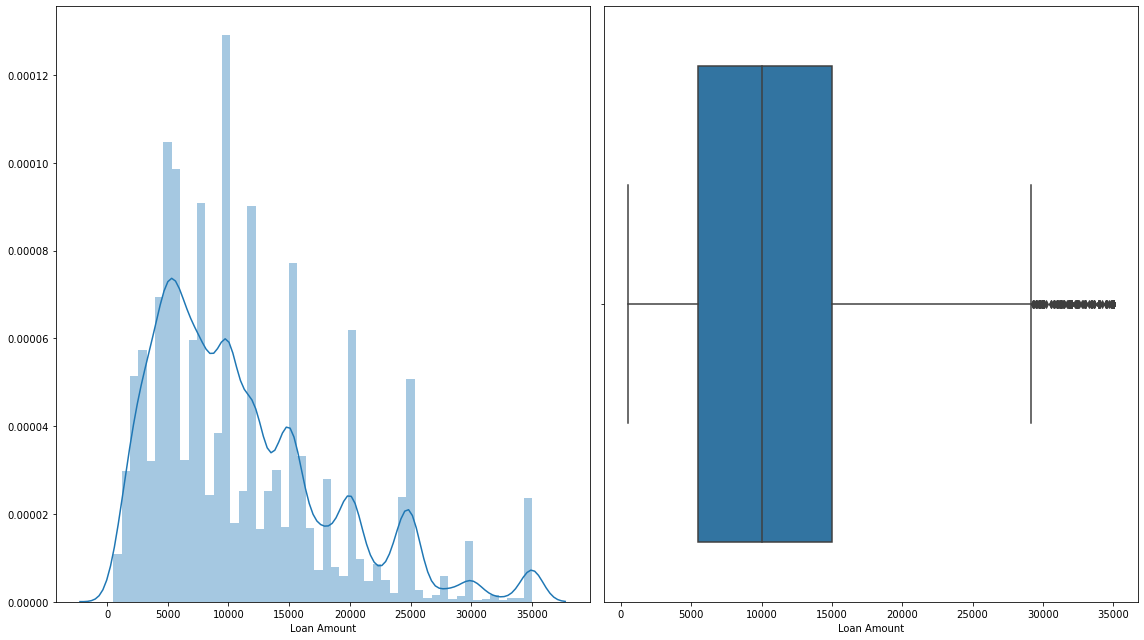

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [48]:
plot_diagram(df_loan,'loan_amnt')
df_loan['loan_amnt'].describe()

From above univariate numeric variable analysis we can find out from description result as well as from plot that 
1.majority of loan amount applied was for range 5k to 15k( between range 25% to 75% )
2.Min and max loan amount applied 500 and 35k respectively.
3.From Box plot we can see the mean is around 1000 and there are some outliers as well.

We will check again these parameters and plots after removing outliers

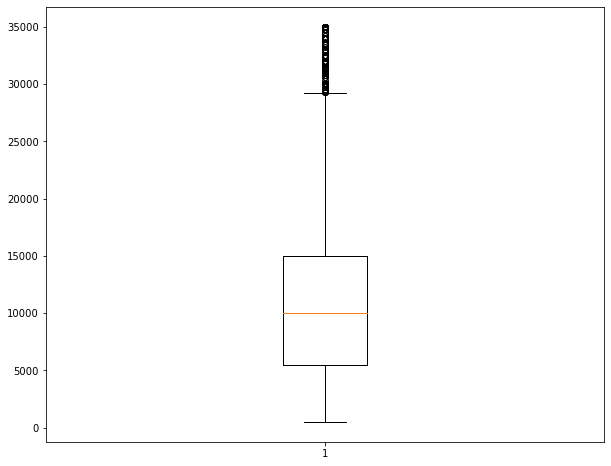

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [49]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['loan_amnt'])
plt.show()
df_loan['loan_amnt'].describe()

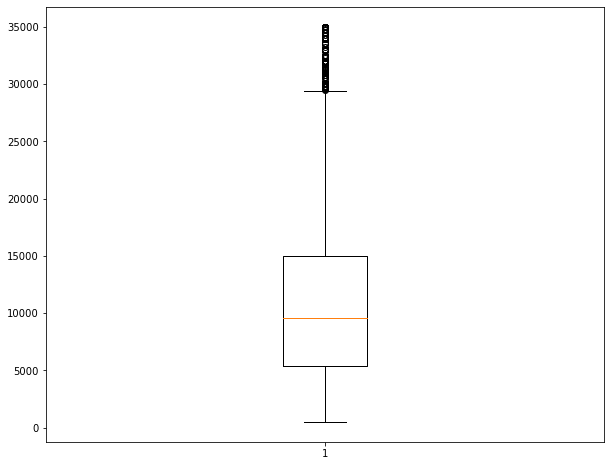

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [50]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['funded_amnt'])
plt.show()
df_loan['funded_amnt'].describe()

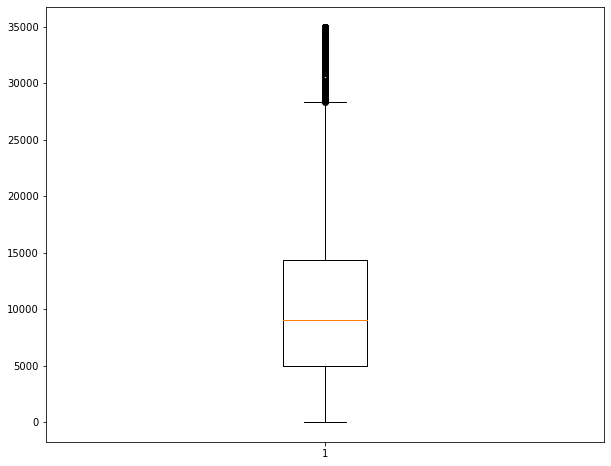

count    36847.000000
mean       324.694599
std        208.886154
min         16.080000
25%        167.565000
50%        280.000000
75%        428.975000
max       1305.190000
Name: installment, dtype: float64

In [51]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['funded_amnt_inv'])
plt.show()
df_loan['installment'].describe()

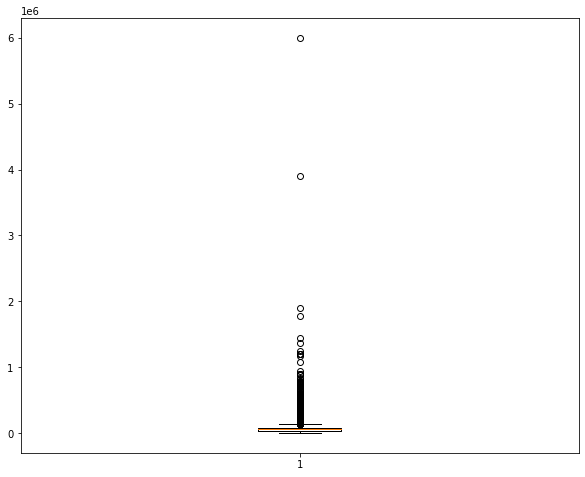

count    3.684700e+04
mean     6.940448e+04
std      6.402747e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [52]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['annual_inc'])
plt.show()
df_loan['annual_inc'].describe()


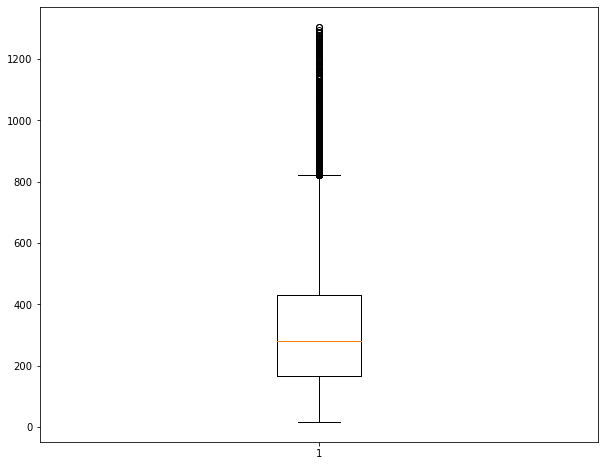

count    36847.000000
mean       324.694599
std        208.886154
min         16.080000
25%        167.565000
50%        280.000000
75%        428.975000
max       1305.190000
Name: installment, dtype: float64

In [53]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['installment'])
plt.show()
df_loan['installment'].describe()

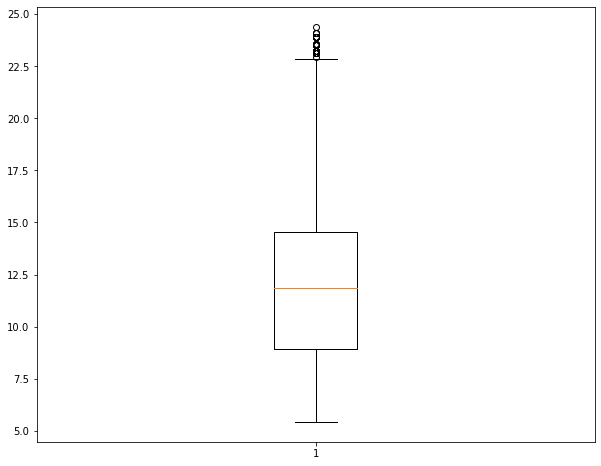

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [54]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['int_rate'])
plt.show()
df_loan['int_rate'].describe()

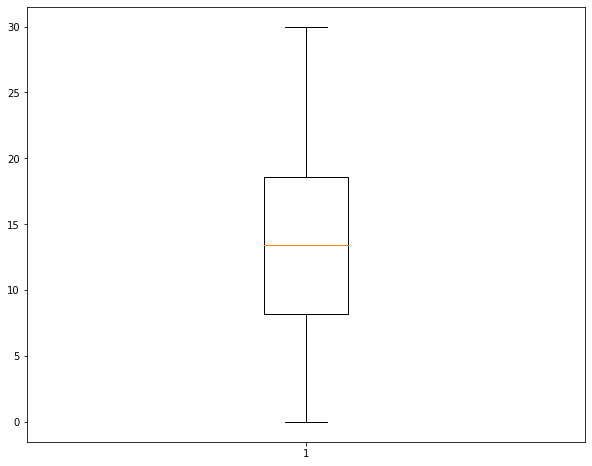

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [55]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['dti'])
plt.show()
df_loan['dti'].describe()

As from above plots we can see outliers in all plots except dti variable, we can use IQR to find and remove outliers
Websites Checked : https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/  , https://stackoverflow.com/questions/54398554/how-to-remove-outliers-in-python and other sources.


In [56]:
outliers_removal_set1=['loan_amnt','funded_amnt','funded_amnt_inv']
outliers_removal_set2=['annual_inc','int_rate','installment']

In [57]:
def remove_outliers(data, columns, threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        higher_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= higher_bound)]
    return data   

In [58]:
#remove outliers
df_loan= remove_outliers(df_loan,outliers_removal_set1,1.5)

In [59]:
df_loan= remove_outliers(df_loan,outliers_removal_set2,1.5)

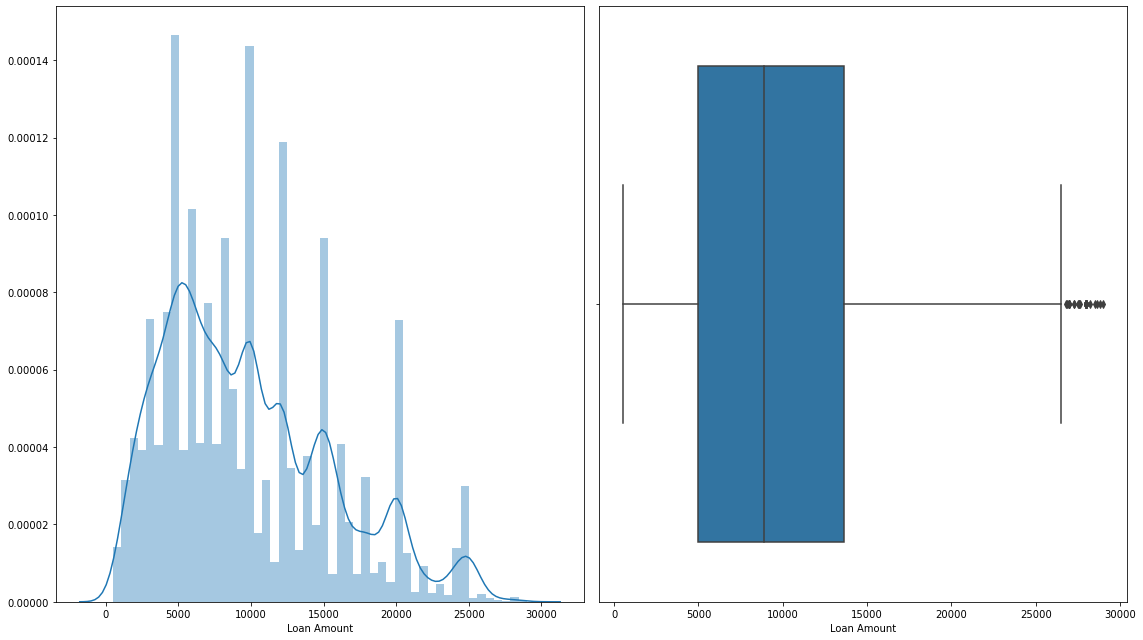

count    33123.000000
mean      9793.820759
std       5784.600495
min        500.000000
25%       5000.000000
50%       8875.000000
75%      13637.500000
max      29000.000000
Name: loan_amnt, dtype: float64

In [60]:
plot_diagram(df_loan,'loan_amnt')
df_loan['loan_amnt'].describe()

Observation:
1.majority of loan amount applied was for range 5k to 14k( between range 25% to 75% )
2.Min and max loan amount were 500 and 29k respectively.

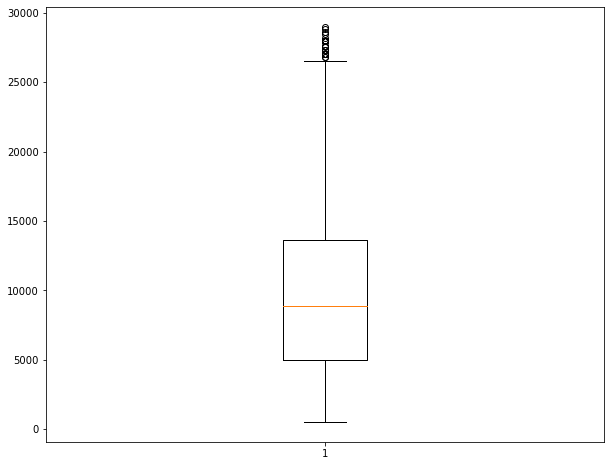

count    33123.000000
mean      9793.820759
std       5784.600495
min        500.000000
25%       5000.000000
50%       8875.000000
75%      13637.500000
max      29000.000000
Name: loan_amnt, dtype: float64

In [61]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['loan_amnt'])
plt.show()
df_loan['loan_amnt'].describe()

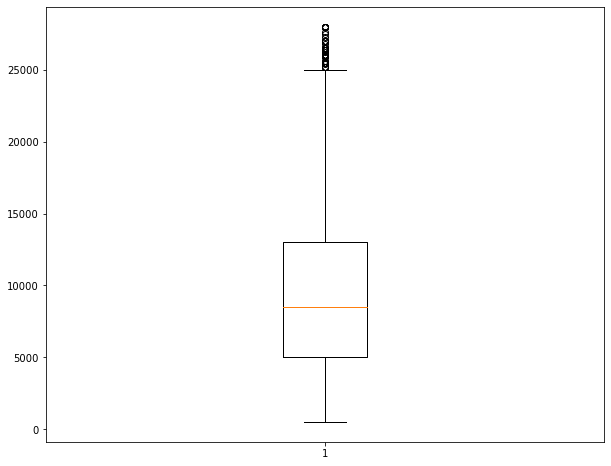

count    33123.000000
mean      9566.342119
std       5537.839091
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [62]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['funded_amnt'])
plt.show()
df_loan['funded_amnt'].describe()

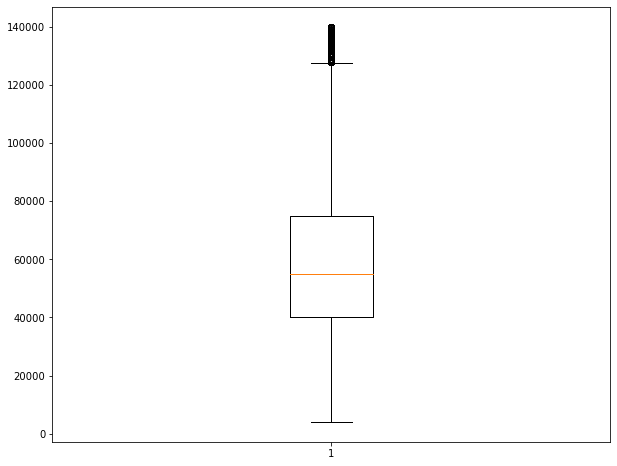

count     33123.000000
mean      59840.662766
std       26905.521024
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [63]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['annual_inc'])
plt.show()
df_loan['annual_inc'].describe()

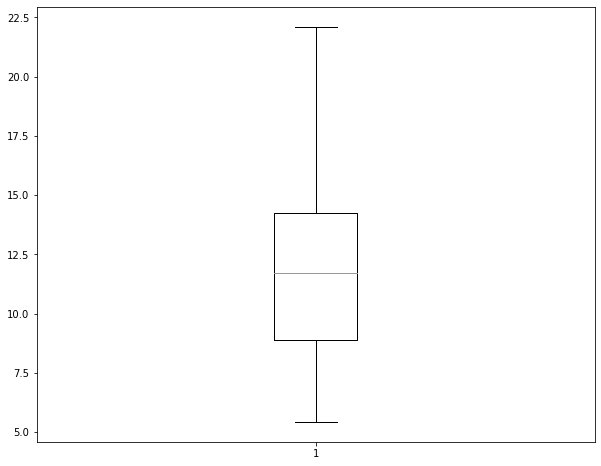

count    33123.000000
mean        11.784016
std          3.591743
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [64]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['int_rate'])
plt.show()
df_loan['int_rate'].describe()

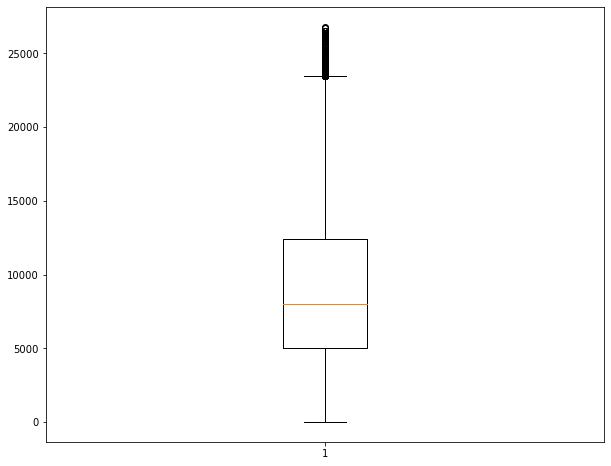

count    33123.000000
mean       285.498601
std        159.780458
min         16.080000
25%        161.035000
50%        260.060000
75%        385.140000
max        746.240000
Name: installment, dtype: float64

In [65]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['funded_amnt_inv'])
plt.show()
df_loan['installment'].describe()

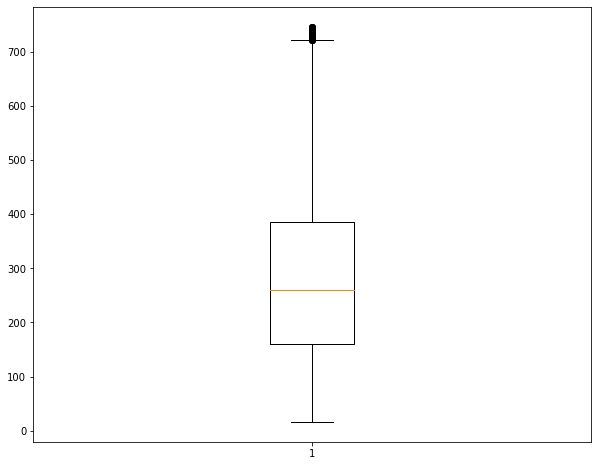

count    33123.000000
mean       285.498601
std        159.780458
min         16.080000
25%        161.035000
50%        260.060000
75%        385.140000
max        746.240000
Name: installment, dtype: float64

In [66]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_loan['installment'])
plt.show()
df_loan['installment'].describe()

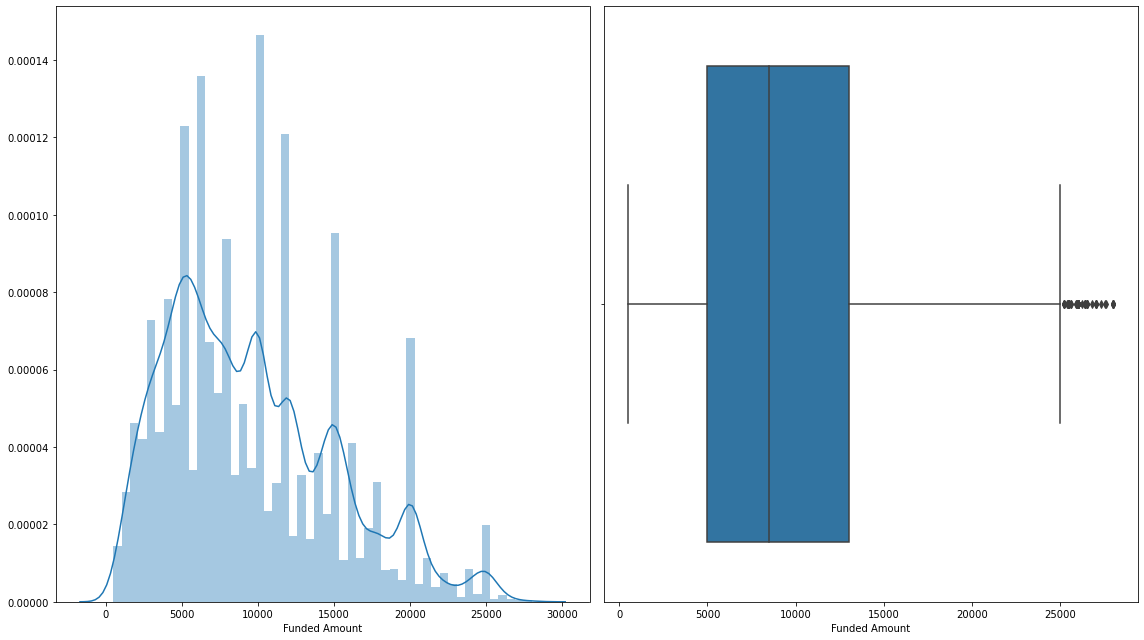

count    33123.000000
mean      9566.342119
std       5537.839091
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [67]:
plot_diagram(df_loan,'funded_amnt')
df_loan['funded_amnt'].describe()

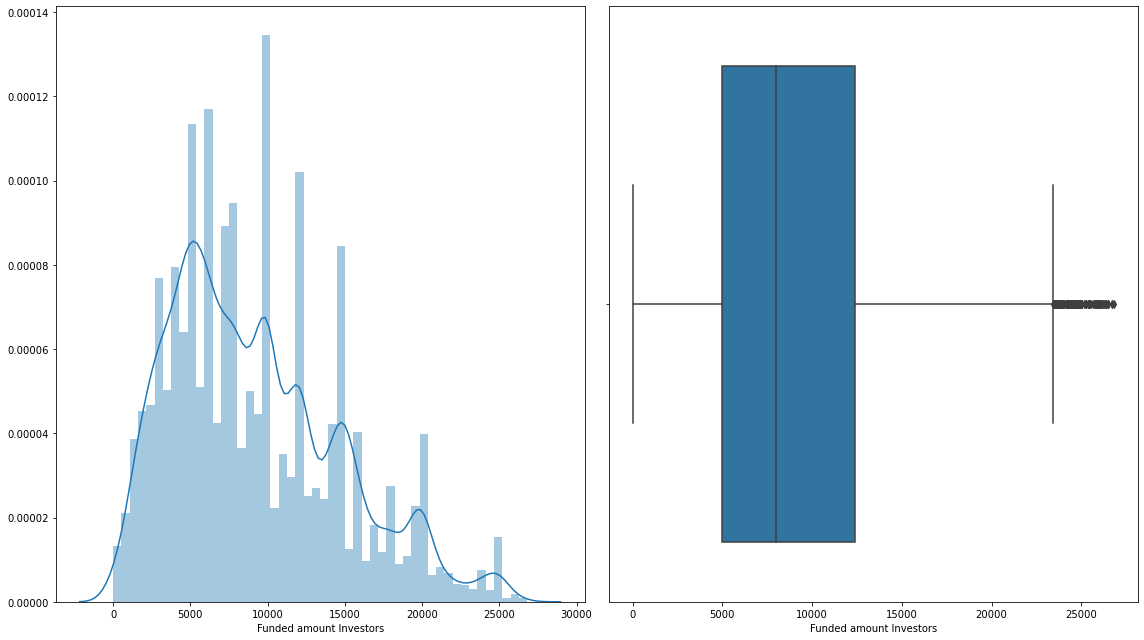

count    33123.000000
mean      9185.439899
std       5485.891914
min          0.000000
25%       5000.000000
50%       8000.000000
75%      12375.000000
max      26800.000000
Name: funded_amnt_inv, dtype: float64

In [68]:
plot_diagram(df_loan,'funded_amnt_inv')
df_loan['funded_amnt_inv'].describe()

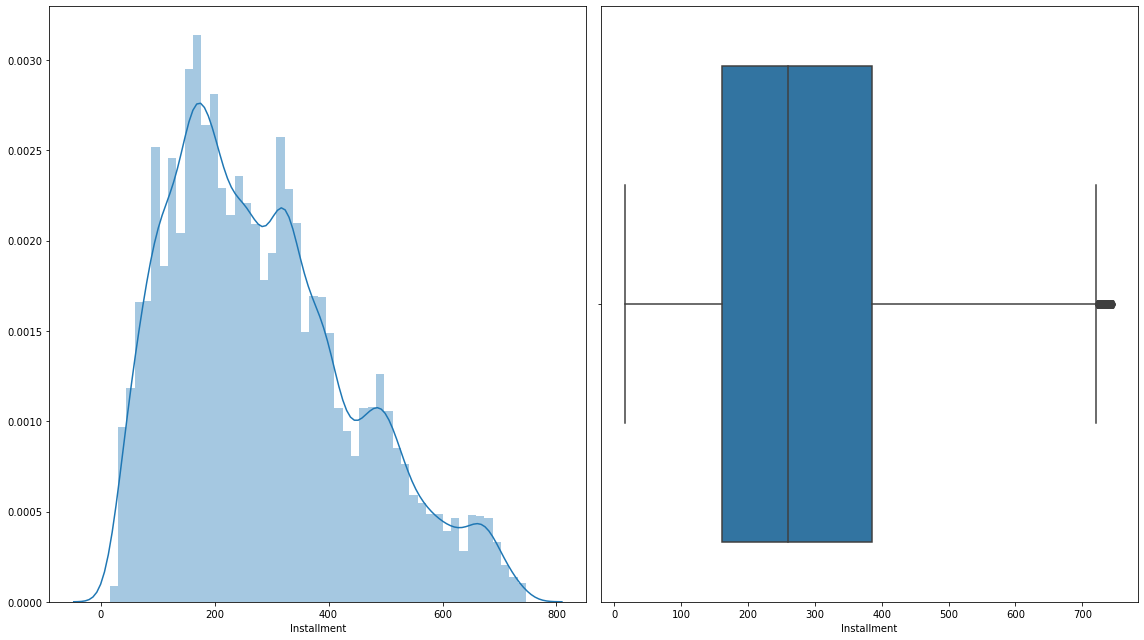

count    33123.000000
mean       285.498601
std        159.780458
min         16.080000
25%        161.035000
50%        260.060000
75%        385.140000
max        746.240000
Name: installment, dtype: float64

In [69]:
plot_diagram(df_loan,'installment')
df_loan['installment'].describe()

Observation: Common Installment range is from 160-385

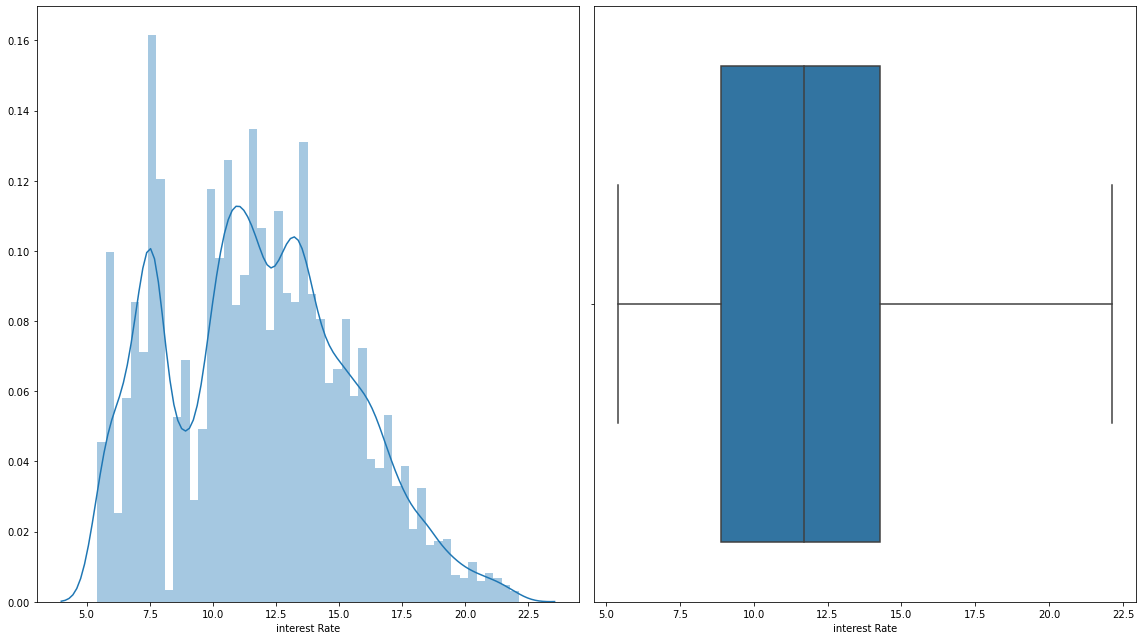

count    33123.000000
mean        11.784016
std          3.591743
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [70]:
plot_diagram(df_loan,'int_rate')
df_loan['int_rate'].describe()

Observation:
Majority applicant's interest rate range is 8.9% to 14%
Average interest rate is 11.8%

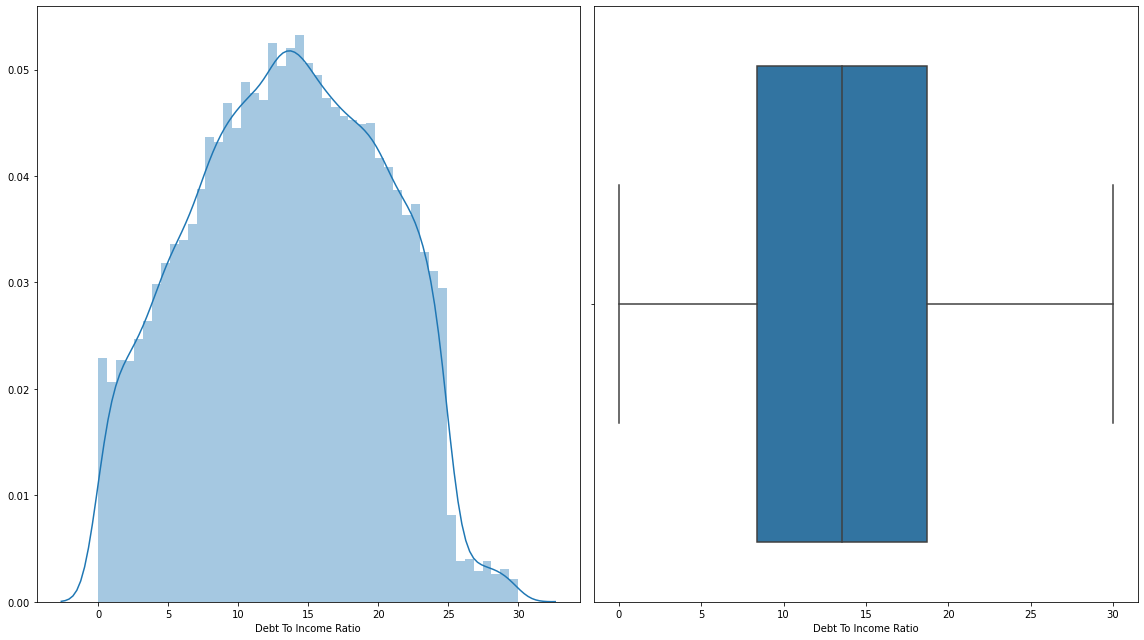

count    33123.000000
mean        13.461372
std          6.652434
min          0.000000
25%          8.360000
50%         13.570000
75%         18.730000
max         29.990000
Name: dti, dtype: float64

In [71]:
plot_diagram(df_loan,'dti')
df_loan['dti'].describe()

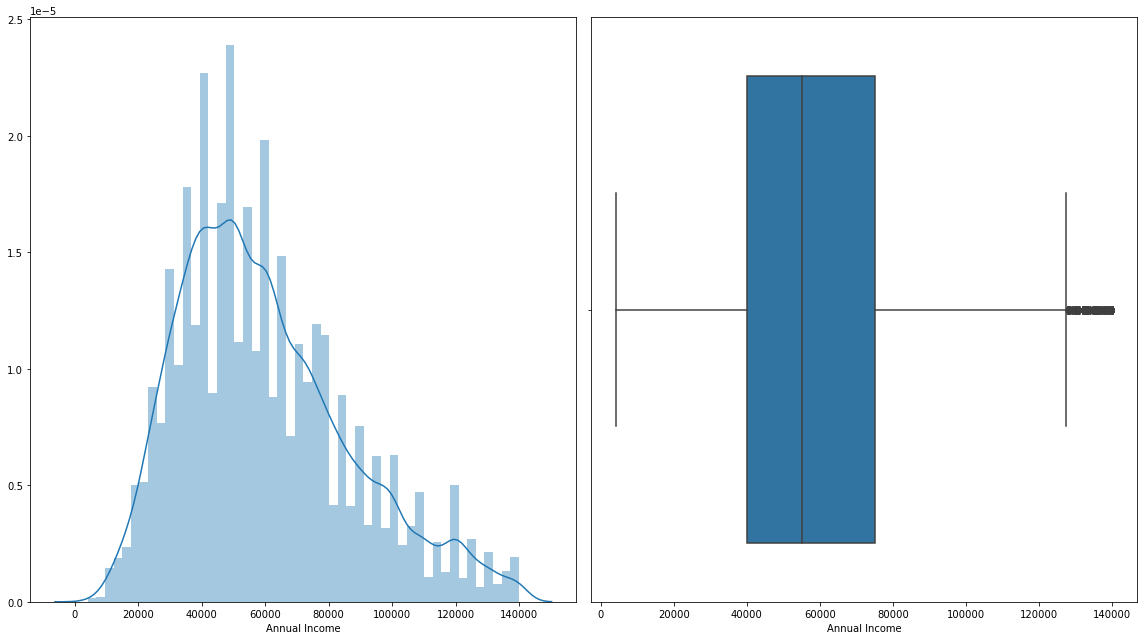

count     33123.000000
mean      59840.662766
std       26905.521024
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [72]:
plot_diagram(df_loan,'annual_inc')
df_loan['annual_inc'].describe()

Observation:
Loan taken are in Annual income is showing a normal distribution ,range 40K-75K .

##### Bucketing Variables

In [73]:
#Bucketing Loan amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column > 5000) and (column <= 10000):
        return '5K-10K'
    elif (column > 10000) and (column <= 15000):
        return '10K-15K'
    else:
        return '15K-Above'  # 75% quartile

df_loan['loan_amnt_b'] = df_loan['loan_amnt'].apply(bucket_loan_amnt)


In [74]:
#Bucketing Annual income
def bucket_annual_income(column):
    if column <= 40000:
        return '0 - 40K'  # 25% quartile
    elif (column > 40000) and (column <= 50000):
        return '40K-50K'
    elif (column > 50000) and (column <= 60000):
        return '50K-60K'
    elif (column > 60000) and (column <= 70000):
        return '60K-70K'
    elif (column > 70000) and (column <= 80000):
        return '70K-80K'
    else:
        return '80K-Above'  # 75% quartile

df_loan['annual_inc_b'] = df_loan['annual_inc'].apply(bucket_annual_income)


In [75]:
#Bucketing Interst Rate

def bucket_interest_rate(column):
    if column <= 9:
        return 'Very Low'  # 25% quartile
    elif (column > 9) and (column <= 11):
        return 'Low'
    elif (column > 11) and (column <= 13):
        return 'Moderate'
    elif (column > 13) and (column < 15):
        return 'High'
    else:
        return 'Very High'  # 75% quartile

df_loan['int_rate_b'] = df_loan['int_rate'].apply(bucket_interest_rate)


In [76]:
#Bucketing dti

def bucket_dti(column):
    if column <= 8:
        return 'Very Low'  # 25% quartile
    elif (column > 8) and (column <= 12):
        return 'Low'
    elif (column > 12) and (column <= 16):
        return 'Moderate'
    elif (column > 16) and (column < 20):
        return 'High'
    else:
        return 'Very High'  # 75% quartile

df_loan['dti_b'] = df_loan['dti'].apply(bucket_dti)


#### Categorical Variable Analysis

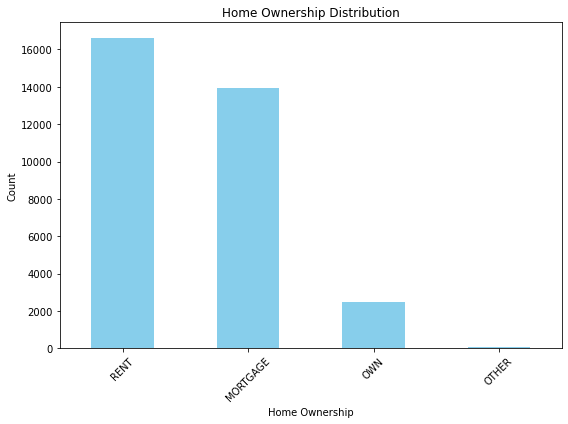

In [77]:
home_ownership_counts = df_loan['home_ownership'].value_counts()
# Plot bar plot
plt.figure(figsize=(8, 6))
home_ownership_counts.plot(kind='bar', color='skyblue')
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


In [78]:
df_loan['home_ownership'].value_counts()

RENT        16617
MORTGAGE    13949
OWN          2468
OTHER          89
Name: home_ownership, dtype: int64

Observation:
As we can see from above bar plot out of  different categories home owners maximum loans were applied by Rented applicants and Mortgage.Where as minimum were by who already owns home.

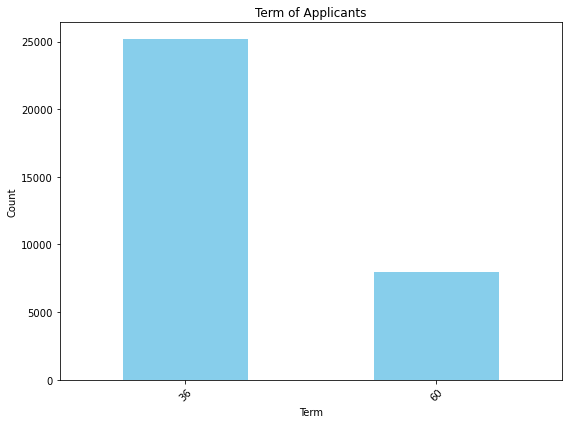

36    25166
60     7957
Name: term, dtype: int64

In [79]:

term_period = df_loan['term'].value_counts()
# Plot bar plot
plt.figure(figsize=(8, 6))
term_period.plot(kind='bar', color='skyblue')
plt.title('Term of Applicants')
plt.xlabel('Term')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()
df_loan['term'].value_counts()

Maximum number of apllicants have term 36 months.

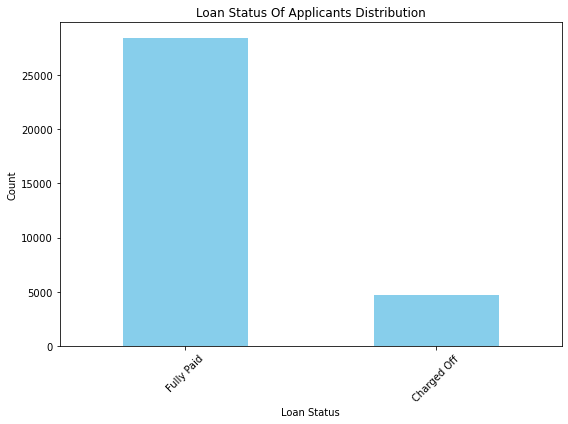

Fully Paid     28416
Charged Off     4707
Name: loan_status, dtype: int64

In [80]:
loan_status_count = df_loan['loan_status'].value_counts()
plt.figure(figsize=(8, 6))
loan_status_count.plot(kind='bar', color='skyblue')
plt.title('Loan Status Of Applicants Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()
df_loan['loan_status'].value_counts()

Observation: From above bar plot shows maximum fully paid 

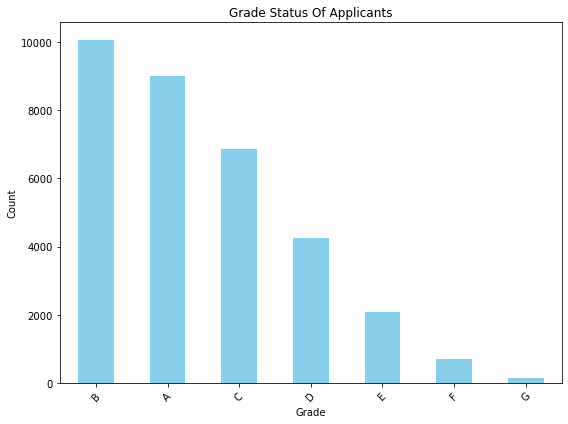

B    10067
A     8995
C     6872
D     4261
E     2073
F      698
G      157
Name: grade, dtype: int64

In [81]:
grade_status = df_loan['grade'].value_counts()
plt.figure(figsize=(8, 6))
grade_status.plot(kind='bar', color='skyblue')
plt.title('Grade Status Of Applicants')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()
df_loan['grade'].value_counts()

Observation:From above grade plot most approved loans are for grade B or high grade.

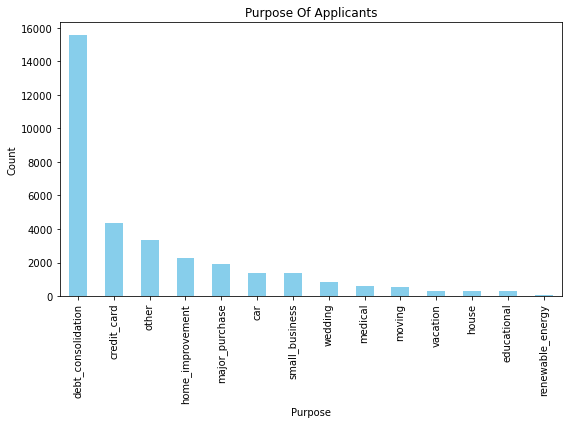

debt_consolidation    15541
credit_card            4331
other                  3352
home_improvement       2296
major_purchase         1914
car                    1373
small_business         1368
wedding                 840
medical                 604
moving                  512
vacation                330
house                   298
educational             281
renewable_energy         83
Name: purpose, dtype: int64

In [82]:
purpose_counts = df_loan['purpose'].value_counts()
plt.figure(figsize=(8, 6))
purpose_counts.plot(kind='bar', color='skyblue')
plt.title('Purpose Of Applicants')
plt.xlabel('Purpose')
plt.ylabel('Count')
#plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()
df_loan['purpose'].value_counts()

Observation:From above bar plot we can visualize maximum reson of loan applicants are for debt consolidation.

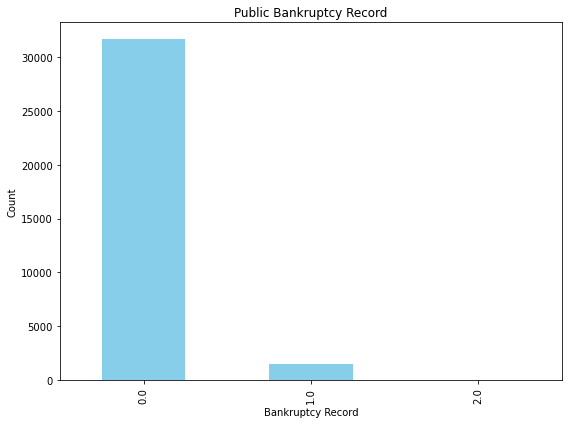

0.0    31673
1.0     1445
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [83]:
bankrptcy_record = df_loan['pub_rec_bankruptcies'].value_counts()
plt.figure(figsize=(8, 6))
bankrptcy_record.plot(kind='bar', color='skyblue')
plt.title('Public Bankruptcy Record')
plt.xlabel('Bankruptcy Record')
plt.ylabel('Count')
#plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()
df_loan['pub_rec_bankruptcies'].value_counts()

Observation: 
1.Very few loans are approved even with bankruptcy record .

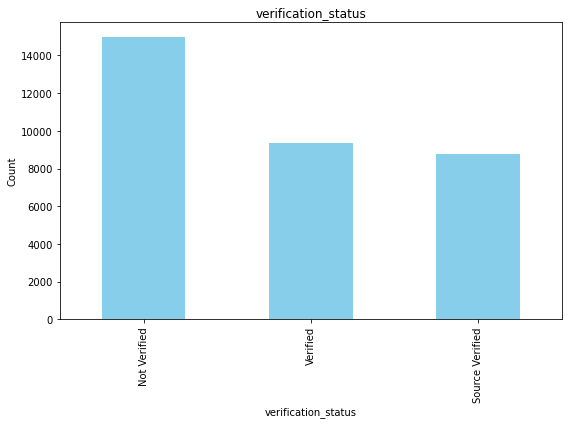

Not Verified       15003
Verified            9360
Source Verified     8760
Name: verification_status, dtype: int64

In [84]:
verification_stat = df_loan['verification_status'].value_counts()
plt.figure(figsize=(8, 6))
verification_stat.plot(kind='bar', color='skyblue')
plt.title('verification_status')
plt.xlabel('verification_status')
plt.ylabel('Count')
#plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()
df_loan['verification_status'].value_counts()

Observation: Maximum applicants loan approved are not verified and minimum is source verified

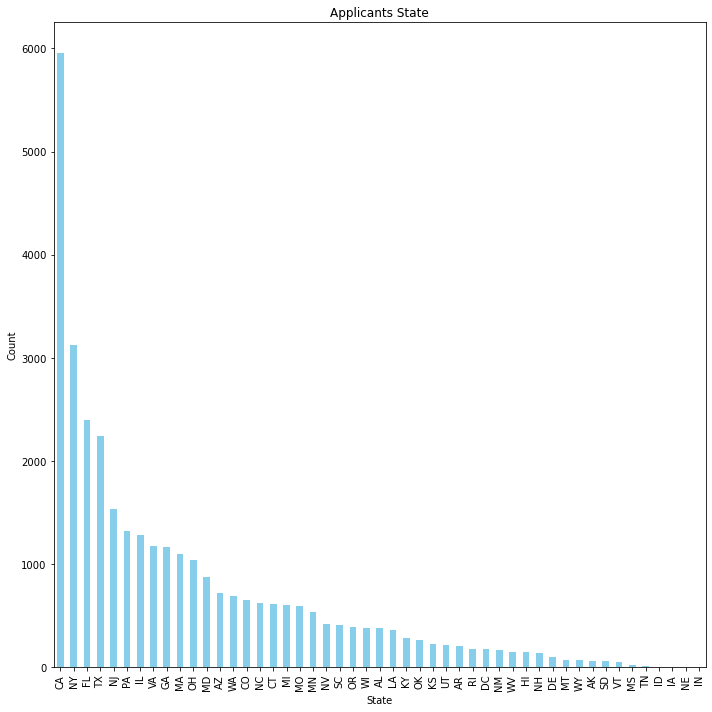

CA    5955
NY    3126
FL    2400
TX    2242
NJ    1529
PA    1321
IL    1281
VA    1176
GA    1161
MA    1096
OH    1039
MD     870
AZ     723
WA     687
CO     652
NC     626
CT     607
MI     599
MO     589
MN     538
NV     415
SC     404
OR     390
WI     378
AL     374
LA     363
KY     285
OK     260
KS     220
UT     216
AR     208
RI     178
DC     173
NM     161
WV     150
HI     147
NH     136
DE     101
MT      73
WY      68
AK      63
SD      59
VT      50
MS      19
TN       9
ID       3
IA       1
NE       1
IN       1
Name: addr_state, dtype: int64

In [85]:
state_map = df_loan['addr_state'].value_counts()
plt.figure(figsize=(10, 10))
state_map.plot(kind='bar', color='skyblue')
plt.title('Applicants State')
plt.xlabel('State')
plt.ylabel('Count')
#plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()
df_loan['addr_state'].value_counts()


Observation: So maximum applicants loans are approved from california.

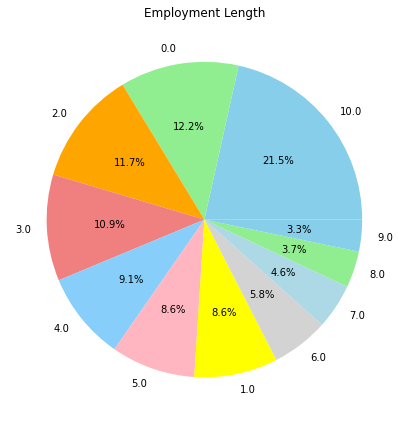

10.0    7127
0.0     4030
2.0     3878
3.0     3608
4.0     3000
5.0     2859
1.0     2839
6.0     1935
7.0     1532
8.0     1236
9.0     1079
Name: emp_length, dtype: int64

In [86]:
#'emp_length'
employement_length = df_loan['emp_length'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(employement_length, labels=employement_length.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'lightcoral', 'lightskyblue', 'lightpink', 'yellow', 'lightgrey', 'lightblue', 'lightgreen'])
plt.title('Employment Length')
plt.tight_layout()
plt.show()

df_loan['emp_length'].value_counts()


Observation: Majority applicants are 10+ employement experience.

### Bivariate Analysis

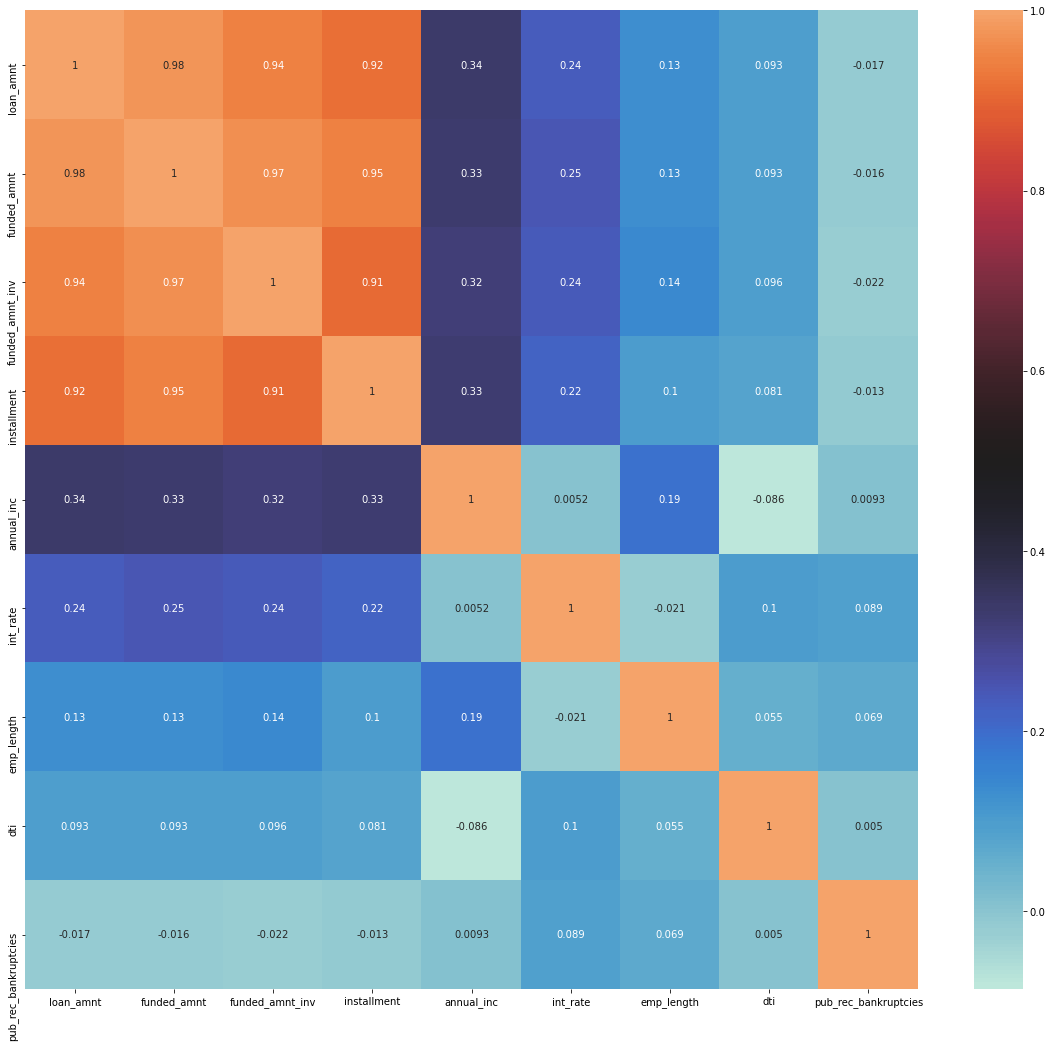

In [87]:
plt.figure(figsize=(20,18))
corr_var= ['loan_amnt','funded_amnt','funded_amnt_inv', 'installment','annual_inc','int_rate','emp_length',
       'dti','pub_rec_bankruptcies']
corr = df_loan[corr_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

Observaation:
From above correlation matrix using the variables loan amnt, interest rate, installment,income,funded amount,dti and bankruptcy recor, we can clearly see that

1.Negative Correlation : with a bankruptcy record it is negatively or very poorly correlated to any other variable like loan  amount, installment, etc.variable Dti is -vely correlated to other variables.

2.Strong Correlation:variable 'funded_amount' is higly correlated to loan_amount by factor .98 or most likely to get the loan approved .Infact funded_amount shares high correlation factor .95 with funded_amnt_investors and with installments.

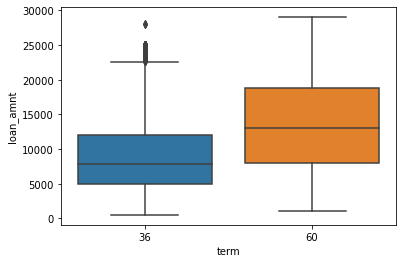

In [88]:
corr_loan = df_loan
#corr = corr_loan.corr()
sns.boxplot(x='term',y='loan_amnt',data=corr_loan)

Observation: This above boxplot correlation shows if term is increasing the loan amount is increasing.

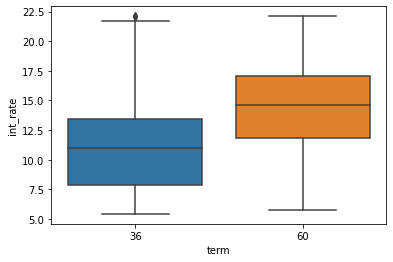

In [89]:
sns.boxplot(x='term',y='int_rate',data=corr_loan)

Observation: Same with term and interest rate correlation with high term interest rate is increasing and vice versa 

In [90]:
#analysis on annual income against chargeoff 

income_range_vs_loan = df_loan.groupby(['annual_inc_b','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

income_range_vs_loan['Total']=income_range_vs_loan['Charged Off']+income_range_vs_loan['Fully Paid']

income_range_vs_loan['ChargedOff_Portion']= income_range_vs_loan['Charged Off']/income_range_vs_loan['Total']
income_range_vs_loan.sort_values('ChargedOff_Portion',ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,ChargedOff_Portion
0,0 - 40K,1570,7326,8896,0.176484
2,50K-60K,788,4423,5211,0.151219
1,40K-50K,805,4590,5395,0.149212
3,60K-70K,486,3250,3736,0.130086
4,70K-80K,385,2739,3124,0.123239
5,80K-Above,673,6088,6761,0.099541


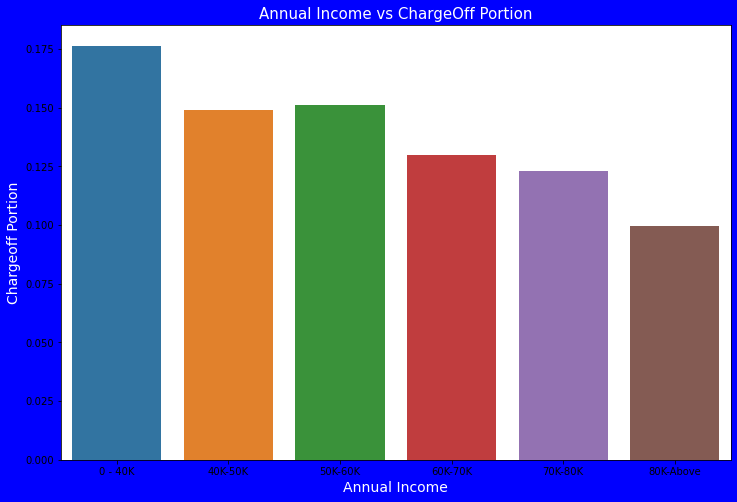

In [91]:
#bar plot for above calculated data for annual income vs chargeoff

fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='b')

ax1.set_title("Annual Income vs ChargeOff Portion", fontsize=15, color='w')

sns.barplot(x='annual_inc_b', y='ChargedOff_Portion', data=income_range_vs_loan, ax=ax1)

ax1.set_xlabel('Annual Income', fontsize=14, color='w')
ax1.set_ylabel('Chargeoff Portion', fontsize=14, color='w')

plt.show()

Observation:
Income range 80K and above has less chances to get charged off .
Income range 0-40K has more chances to get charged off.
So with increase in income charge off portion decreases.

In [92]:
##bivariate analysis on interest rate against chargeoff
interestrate_vs_loan = df_loan.groupby(['int_rate_b','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

interestrate_vs_loan['Total']=interestrate_vs_loan['Charged Off']+interestrate_vs_loan['Fully Paid']

interestrate_vs_loan['CharedOff_Portion']= interestrate_vs_loan['Charged Off']/interestrate_vs_loan['Total']

interestrate_vs_loan.sort_values('CharedOff_Portion',ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,CharedOff_Portion
3,Very High,1667,4743,6410,0.260062
0,High,985,4841,5826,0.169070
2,Moderate,959,5626,6585,0.145634
1,Low,579,4982,5561,0.104118
4,Very Low,517,8224,8741,0.059147


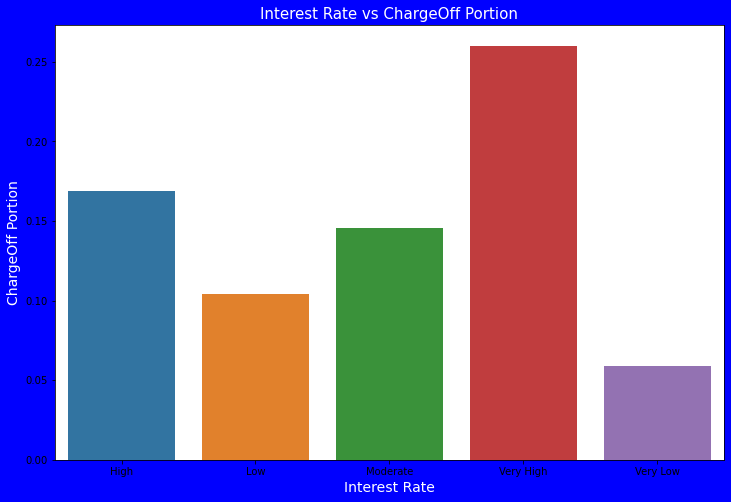

In [93]:
#bar plot for above calculated data for interest rate vs chargeoff

fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='b')
ax1.set_title("Interest Rate vs ChargeOff Portion", fontsize=15, color='w')

sns.barplot(x='int_rate_b', y='CharedOff_Portion', data=interestrate_vs_loan, ax=ax1)
ax1.set_xlabel('Interest Rate', fontsize=14, color='w')
ax1.set_ylabel('ChargeOff Portion', fontsize=14, color='w')

plt.show()


Observations:
Interest rate less than 10% or very low has very less chance of charged off.
Interest rate more than 16% or very high has very high chance of charged off.
With increase in interest rate charge off portion increases.

In [94]:
##bivariate analysis on Home ownership against chargeoff
homeownership_vs_loan = df_loan.groupby(['home_ownership','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

homeownership_vs_loan['Total']=homeownership_vs_loan['Charged Off']+homeownership_vs_loan['Fully Paid']

homeownership_vs_loan['CharedOff_Portion']= homeownership_vs_loan['Charged Off']/homeownership_vs_loan['Total']

homeownership_vs_loan.sort_values('CharedOff_Portion',ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,CharedOff_Portion
1,OTHER,16,73,89,0.179775
3,RENT,2485,14132,16617,0.149546
2,OWN,354,2114,2468,0.143436
0,MORTGAGE,1852,12097,13949,0.132769


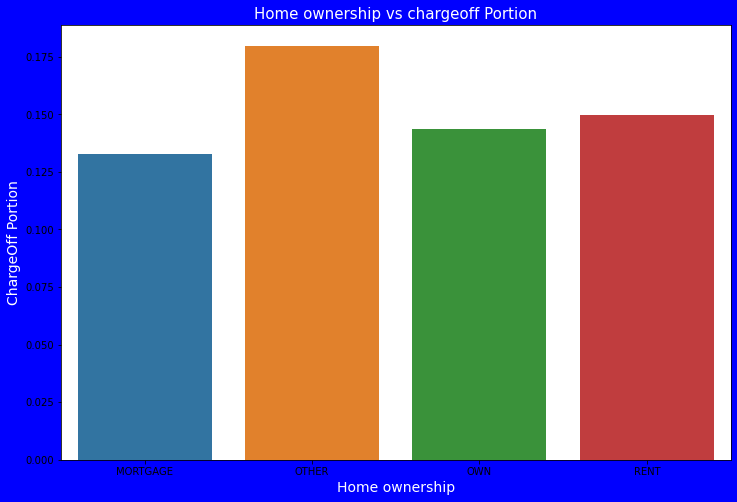

In [95]:
#bar plot for above calculated data for ##bivariate analysis on Home ownership vs chargeoff

fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='b')
ax1.set_title("Home ownership vs chargeoff Portion", fontsize=15, color='w')

sns.barplot(x='home_ownership', y='CharedOff_Portion', data=homeownership_vs_loan, ax=ax1)
ax1.set_xlabel('Home ownership', fontsize=14, color='w')
ax1.set_ylabel('ChargeOff Portion', fontsize=14, color='w')

plt.show()

Observation:
Applicants who owns house or on mortgage are having low chances of loan defaults.
Applicants who doesn't own are on high chances of loan defaults.

In [96]:
##bivariate analysis on Purpose of loan variable  against chargeoff
purposeofloan_vs_loan = df_loan.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purposeofloan_vs_loan['Total']=purposeofloan_vs_loan['Charged Off']+purposeofloan_vs_loan['Fully Paid']
purposeofloan_vs_loan['CharedOff_Portion']= purposeofloan_vs_loan['Charged Off']/purposeofloan_vs_loan['Total']
purposeofloan_vs_loan.sort_values('CharedOff_Portion',ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,CharedOff_Portion
11,small_business,366,1002,1368,0.267544
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2821,3352,0.158413
7,medical,95,509,604,0.157285
8,moving,79,433,512,0.154297
2,debt_consolidation,2324,13217,15541,0.149540
12,vacation,49,281,330,0.148485
4,home_improvement,276,2020,2296,0.120209


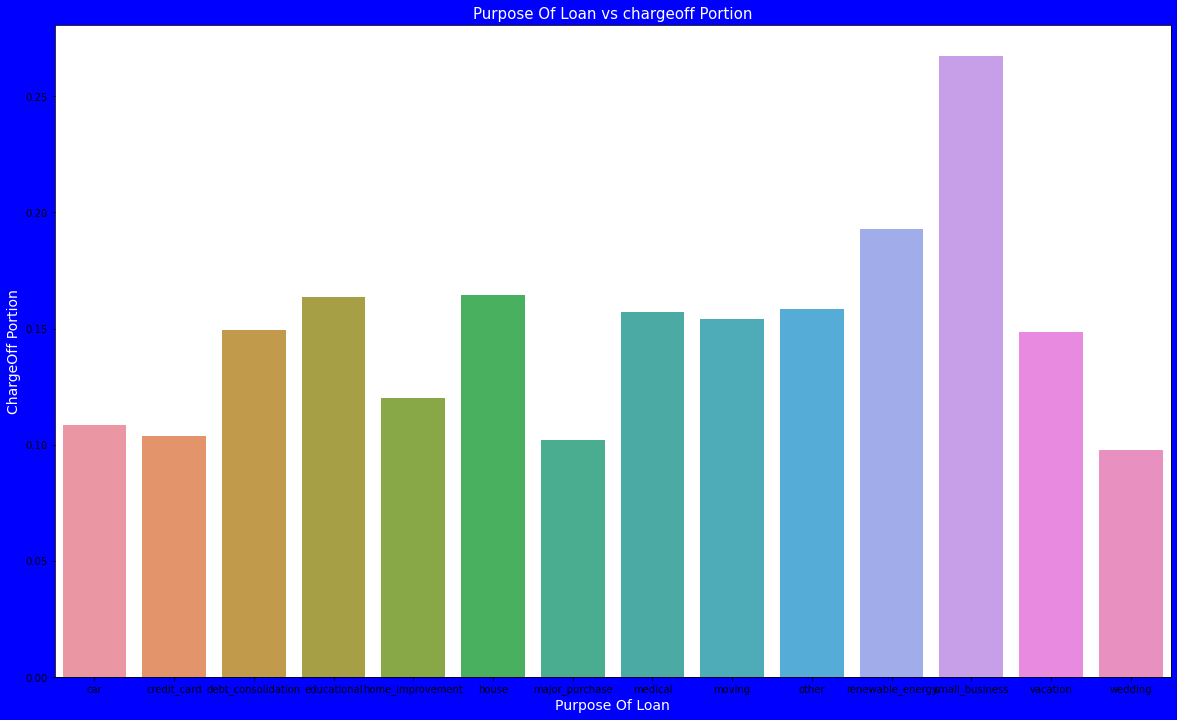

In [97]:
fig, ax1 = plt.subplots(figsize=(20, 12), facecolor='b')
ax1.set_title("Purpose Of Loan vs chargeoff Portion", fontsize=15, color='w')
sns.barplot(x='purpose', y='CharedOff_Portion', data=purposeofloan_vs_loan, ax=ax1)
ax1.set_xlabel('Purpose Of Loan', fontsize=14, color='w')
ax1.set_ylabel('ChargeOff Portion', fontsize=14, color='w')
plt.show()

Observation:
1.loan applied for purpose of Small business are highly charge off or in loan defaults.
2.wedding,credit card loan purposes are in low risk of loan defaults.

In [98]:
##bivariate analysis on bankruptcy  against chargeoff

bankruptcyrec_vs_loan = df_loan.groupby(['pub_rec_bankruptcies','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcyrec_vs_loan['Total']=purposeofloan_vs_loan['Charged Off']+purposeofloan_vs_loan['Fully Paid']
bankruptcyrec_vs_loan['CharedOff_Portion']= purposeofloan_vs_loan['Charged Off']/purposeofloan_vs_loan['Total']
bankruptcyrec_vs_loan.sort_values('CharedOff_Portion',ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,CharedOff_Portion
2,2.0,2,3,15541,0.149540
0,0.0,4397,27276,1373,0.108521
1,1.0,308,1137,4331,0.103902


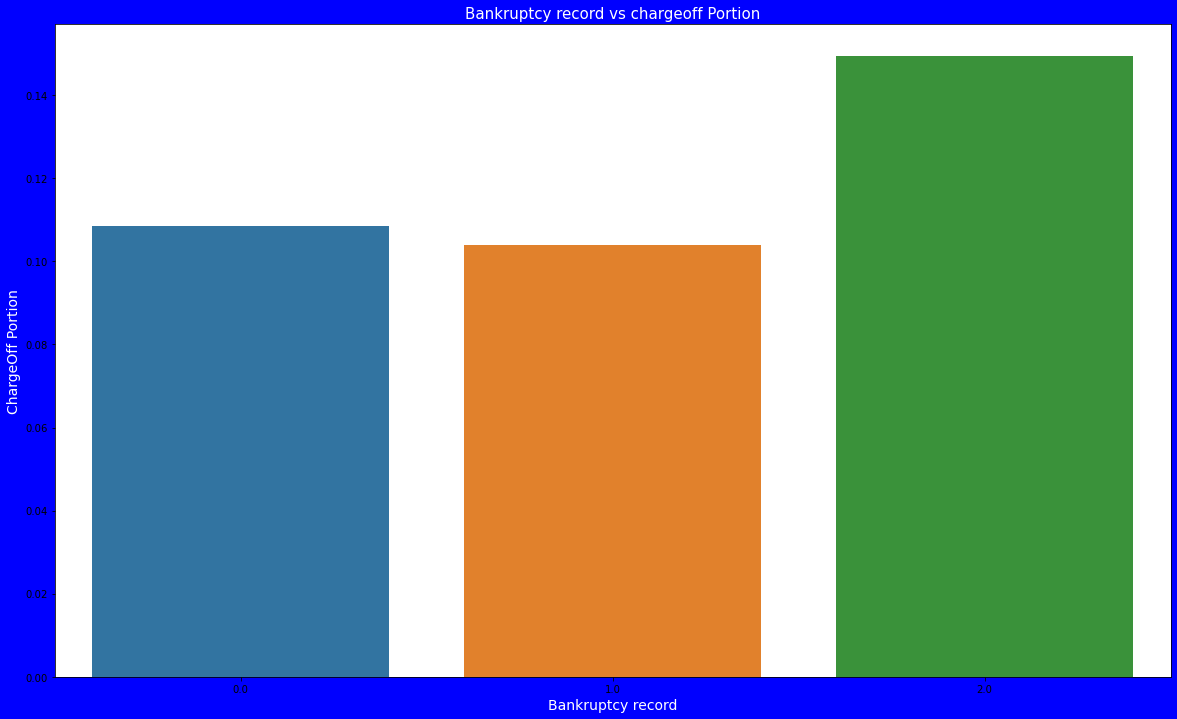

In [99]:
fig, ax1 = plt.subplots(figsize=(20, 12), facecolor='b')
ax1.set_title("Bankruptcy record vs chargeoff Portion", fontsize=15, color='w')
sns.barplot(x='pub_rec_bankruptcies', y='CharedOff_Portion', data=bankruptcyrec_vs_loan, ax=ax1)
ax1.set_xlabel('Bankruptcy record', fontsize=14, color='w')
ax1.set_ylabel('ChargeOff Portion', fontsize=14, color='w')
plt.show()

Observation:
With high bankruptcy records has high chances of chargeoff or loan defaults and vice versa.


In [100]:
##bivariate analysis on Issue year  against chargeoff

issueyear_vs_loan = df_loan.groupby(['issue_year','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issueyear_vs_loan['Total']=issueyear_vs_loan['Charged Off']+issueyear_vs_loan['Fully Paid']
issueyear_vs_loan['CharedOff_Portion']= issueyear_vs_loan['Charged Off']/issueyear_vs_loan['Total']
issueyear_vs_loan.sort_values('CharedOff_Portion',ascending=False)

loan_status,issue_year,Charged Off,Fully Paid,Total,CharedOff_Portion
0,2007,2,5,7,0.285714
4,2011,2701,14753,17454,0.154750
1,2008,158,877,1035,0.152657
3,2010,1310,8996,10306,0.127110
2,2009,536,3785,4321,0.124045


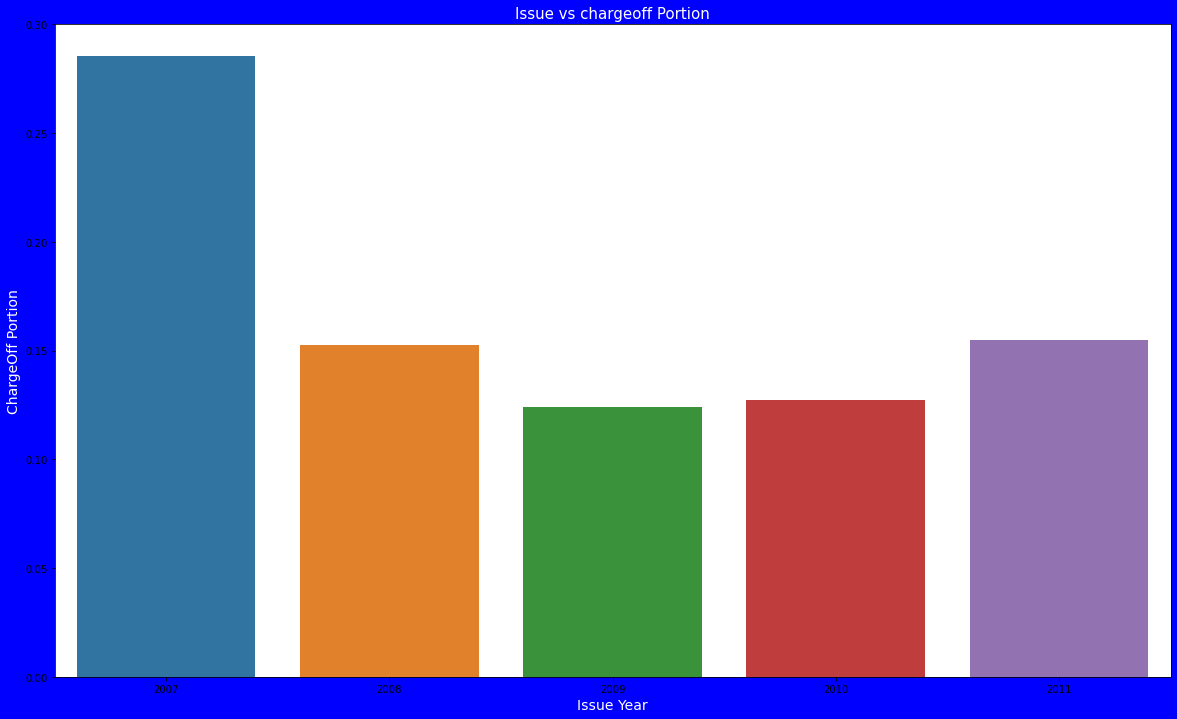

In [101]:
fig, ax1 = plt.subplots(figsize=(20, 12), facecolor='b')
ax1.set_title("Issue vs chargeoff Portion", fontsize=15, color='w')
sns.barplot(x='issue_year', y='CharedOff_Portion', data=issueyear_vs_loan, ax=ax1)
ax1.set_xlabel('Issue Year', fontsize=14, color='w')
ax1.set_ylabel('ChargeOff Portion', fontsize=14, color='w')
plt.show()

Observation:
Maximum chargeoff or high number of default loans happened in year 2007.
Minimum chargeoff or low number of default loans were in 2009.


In [102]:
##bivariate analysis on Issue month  against chargeoff

issuemonth_vs_loan = df_loan.groupby(['issue_month','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issuemonth_vs_loan['Total']=issuemonth_vs_loan['Charged Off']+issuemonth_vs_loan['Fully Paid']
issuemonth_vs_loan['CharedOff_Portion']= issuemonth_vs_loan['Charged Off']/issuemonth_vs_loan['Total']
issuemonth_vs_loan.sort_values('CharedOff_Portion',ascending=False)

loan_status,issue_month,Charged Off,Fully Paid,Total,CharedOff_Portion
8,9,476,2526,3002,0.158561
11,12,564,3020,3584,0.157366
4,5,401,2186,2587,0.155006
9,10,461,2687,3148,0.146442
5,6,409,2385,2794,0.146385
10,11,493,2964,3457,0.142609
6,7,415,2530,2945,0.140917
7,8,405,2554,2959,0.136871
0,1,260,1722,1982,0.131181
3,4,317,2174,2491,0.127258


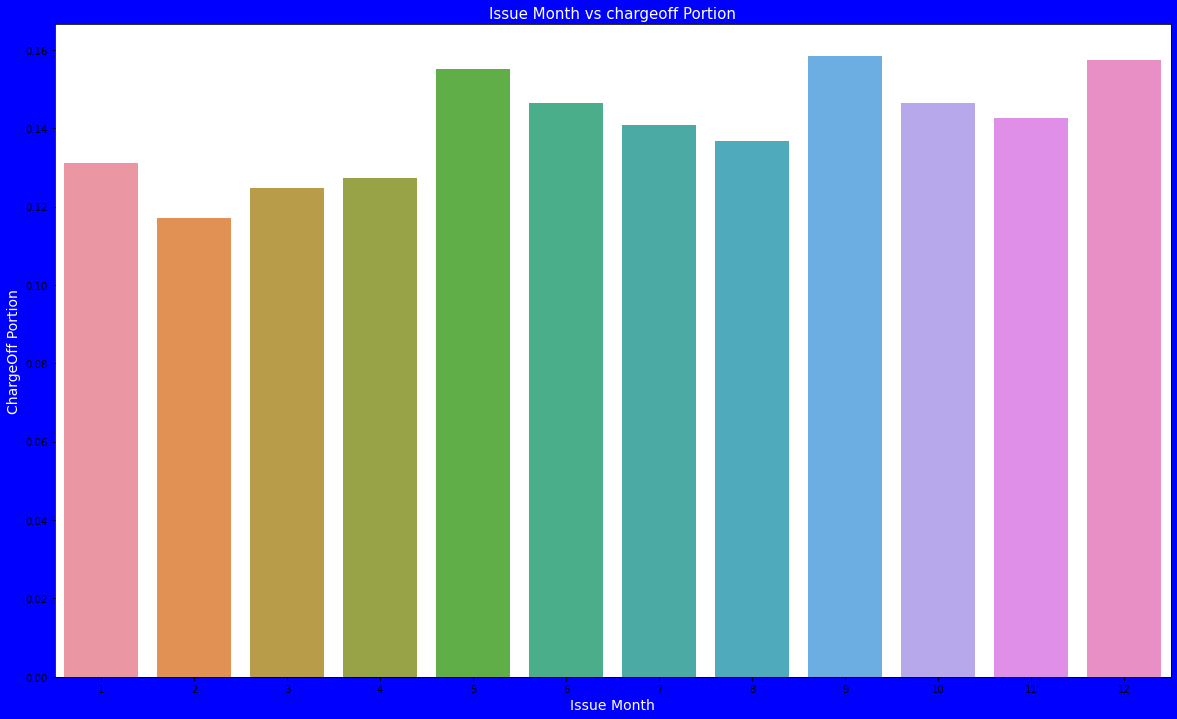

In [103]:
fig, ax1 = plt.subplots(figsize=(20, 12), facecolor='b')
ax1.set_title("Issue Month vs chargeoff Portion", fontsize=15, color='w')
sns.barplot(x='issue_month', y='CharedOff_Portion', data=issuemonth_vs_loan, ax=ax1)
ax1.set_xlabel('Issue Month', fontsize=14, color='w')
ax1.set_ylabel('ChargeOff Portion', fontsize=14, color='w')
plt.show()

Observation:
Majority of loan defaults were issued in month between september to December.
Less number of loan defaults were in month between January to April.

In [104]:
##bivariate analysis on Address state  against chargeoff

addressstate_vs_loan = df_loan.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addressstate_vs_loan['Total']=addressstate_vs_loan['Charged Off']+addressstate_vs_loan['Fully Paid']
addressstate_vs_loan['CharedOff_Portion']= addressstate_vs_loan['Charged Off']/addressstate_vs_loan['Total']
addressstate_vs_loan.sort_values('CharedOff_Portion',ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,CharedOff_Portion
40,TN,2.0,7.0,9.0,0.222222
31,NV,87.0,328.0,415.0,0.209639
11,HI,28.0,119.0,147.0,0.190476
0,AK,12.0,51.0,63.0,0.190476
39,SD,11.0,48.0,59.0,0.186441
30,NM,28.0,133.0,161.0,0.173913
9,FL,413.0,1987.0,2400.0,0.172083
23,MO,98.0,491.0,589.0,0.166384
35,OR,63.0,327.0,390.0,0.161538
10,GA,183.0,978.0,1161.0,0.157623


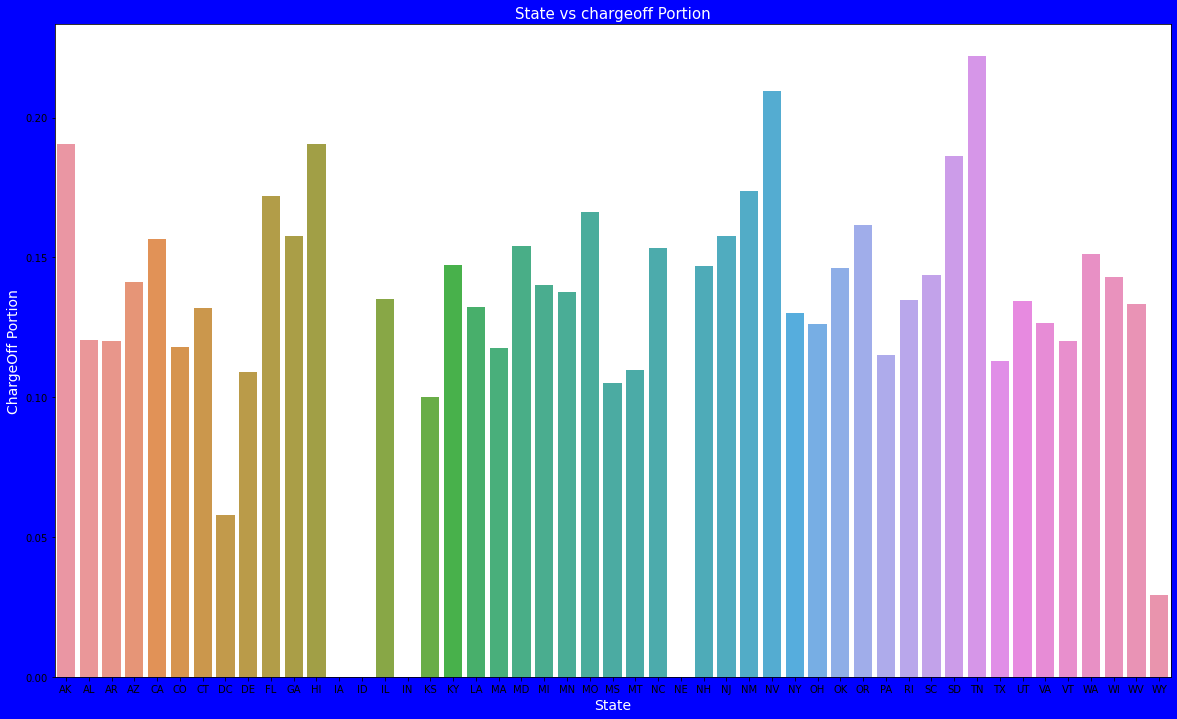

In [105]:
fig, ax1 = plt.subplots(figsize=(20, 12), facecolor='b')
ax1.set_title("State vs chargeoff Portion", fontsize=15, color='w')
sns.barplot(x='addr_state', y='CharedOff_Portion', data=addressstate_vs_loan, ax=ax1)
ax1.set_xlabel('State', fontsize=14, color='w')
ax1.set_ylabel('ChargeOff Portion', fontsize=14, color='w')
plt.show()

Observation:
Maximum chargeoff were in state Tennessee followed by Nevada in US.
Where as there states NE,IA,ID,IN are with no loan deafults.

In [106]:
##bivariate analysis on Grade  against chargeoff

grade_vs_loan = df_loan.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total']=grade_vs_loan['Charged Off']+grade_vs_loan['Fully Paid']
grade_vs_loan['CharedOff_Portion']= grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('CharedOff_Portion',ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,CharedOff_Portion
6,G,54,103,157,0.343949
5,F,220,478,698,0.315186
4,E,556,1517,2073,0.268210
3,D,941,3320,4261,0.220840
2,C,1176,5696,6872,0.171129
1,B,1223,8844,10067,0.121486
0,A,537,8458,8995,0.059700


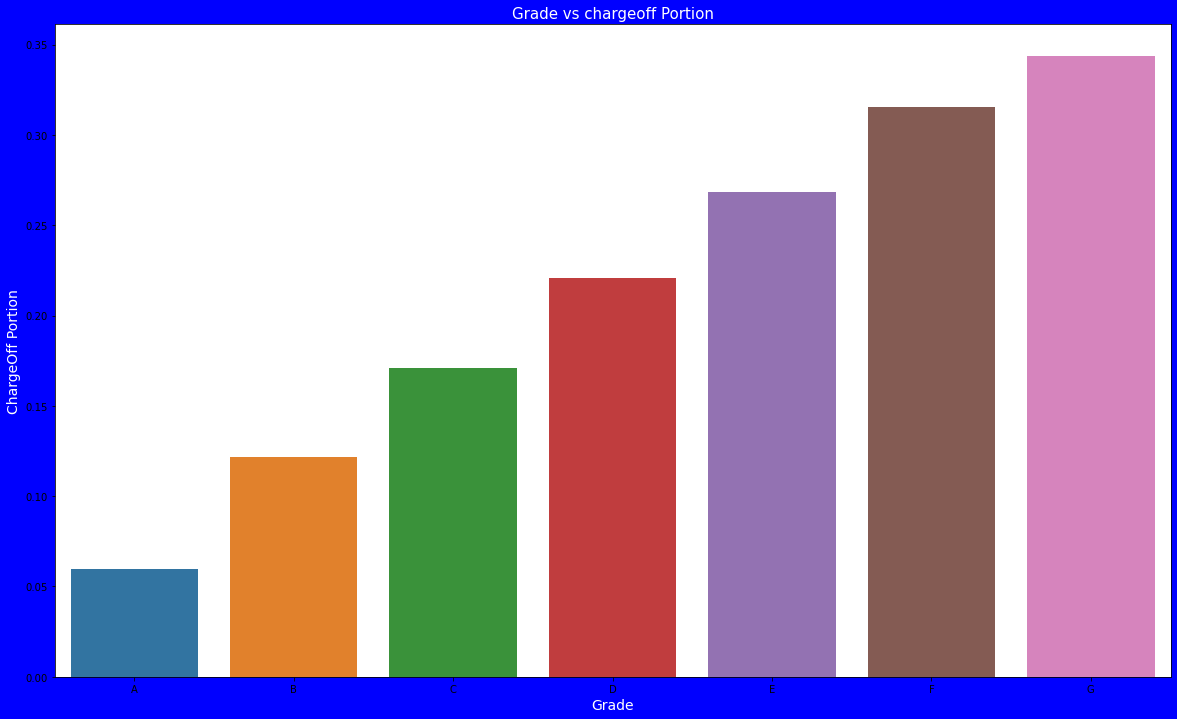

In [107]:
fig, ax1 = plt.subplots(figsize=(20, 12), facecolor='b')
ax1.set_title("Grade vs chargeoff Portion", fontsize=15, color='w')
sns.barplot(x='grade', y='CharedOff_Portion', data=grade_vs_loan, ax=ax1)
ax1.set_xlabel('Grade', fontsize=14, color='w')
ax1.set_ylabel('ChargeOff Portion', fontsize=14, color='w')
plt.show()

Observation:
Applicants with G and F loan grades are having most loan defaults.
Loan grade A applicants are less chargedoff.